### SVM
- SVM (Support Vector Machines) is a machine learning algorithm used for classification.
- It works by dividing data with lines that give the highest possible margin between two points.
    - The dividor is technically a hyperplane, which is an $n-1$ dimensional subspace. This is an important distinction in 3 or more dimensions.
    - This is called the support vector classifier.
- SVM is a supervised learning algorithm, so training data must be classified already.
- SVM will sometimes need to missclassify data in order to generate better results in the long run. 
    - These results go in what is called the "soft margin".
    - This is done by a process called cross-validation.
- These linear support vector classifiers are great due to their simplicity, but complex datasets might require nonlinear boundaries. This will be discussed more later.

In [6]:
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import numpy as np

import datasets.clusters

### Imports
- `sklearn.cluster` is the library used for clustering algorithms from scikit learn
- `matplotlib.pyplot` is the library used for plotting
- `numpy` is used for some computations
- `datasets.clusters` is the library I built to generate classification datasets

In [7]:
dataset_1, labels_1 = datasets.clusters.gen_data([[10, 10], [25, 25]], 50, 1, 10, 0)
dataset_1_var, labels_1v = datasets.clusters.gen_data([[10, 10], [25, 25]], 50, 1, 10, 0.3)

dataset_2, labels_2 = datasets.clusters.gen_data([[10, 10], [-10, 10], [-10, -10], [10, -10]], 30, 1, 10, 0)
dataset_2_var, labels_2v = datasets.clusters.gen_data([[10, 10], [-10, 10], [-10, -10], [10, -10]], 30, 1, 10, 0.3)

dataset_3, labels_3 = datasets.clusters.gen_data([[3, 3], [-3, 3], [-3, -3], [3, -3]], 30, 1, 10, 0)
dataset_3_var, labels_3v = datasets.clusters.gen_data([[3, 3], [-3, 3], [-3, -3], [3, -3]], 30, 1, 10, 0.3)

dataset_4, labels_4 = datasets.clusters.gen_data([[1, 1], [2, 3], [-1, 2], [3, -2]], 30, 1, 3, 0)
dataset_4_var, labels_4v = datasets.clusters.gen_data([[1, 1], [2, 3], [-1, 2], [3, -2]], 30, 1, 3, 0.3)

### Datasets
- Each dataset has a version with and without variance. Variance essentially allows for outliers.
- For each dataset:
    - `dataset_1` has two clusters that are very separate
    - `dataset_2` has four clusters that don't overlap at all
    - `dataset_3` has four clusters that are close to one another
    - `dataset_4` has four clusters that greatly overlap

In [ ]:
def train_and_plot(model: SVC, dataset: np.ndarray, labels: np.ndarray) -> None:
    model.fit(dataset, labels)

    colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown']
    ax = plt.gca()

    unique_labels = np.unique(labels)
    for i, label in enumerate(unique_labels):
        points = dataset[labels == label]
        ax.scatter(points[:, 0], points[:, 1], c=colors[i % len(colors)], label=f"Cluster {label}")

    lim1 = abs(np.max(dataset)) + 1
    lim2 = abs(np.min(dataset)) + 1
    limit = max(lim1, lim2)
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)

    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=len(unique_labels)-1, colors='k', linewidths=1)

    ax.legend()
    plt.show()

### Training
- All we need to do is fit the data and then organize it by label.
- After this is done, each label (cluster) is plotted in a different color.
- Support vector classifiers are also plotted.

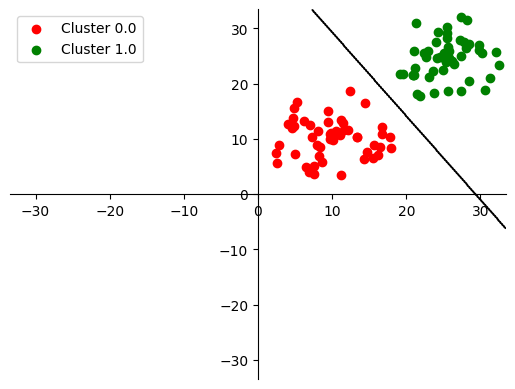

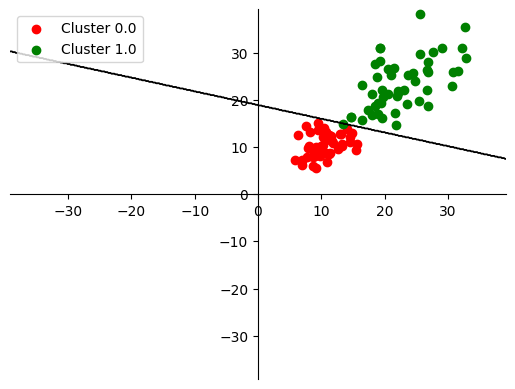

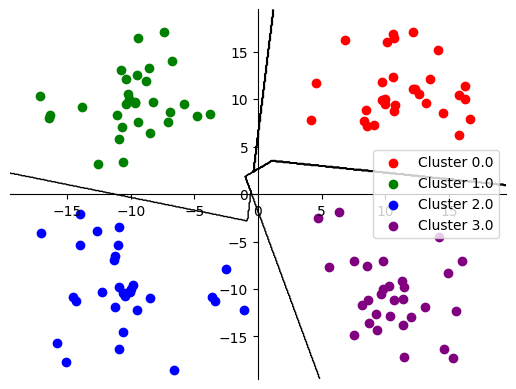

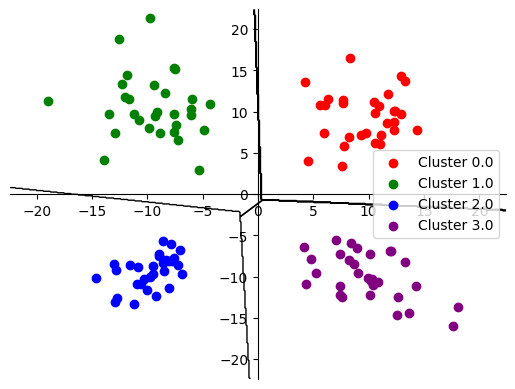

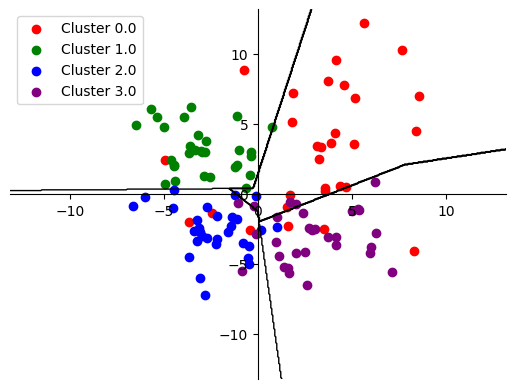

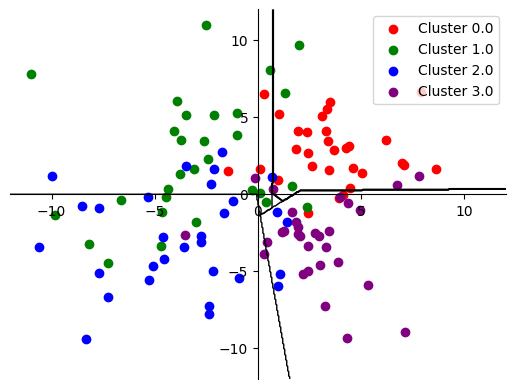

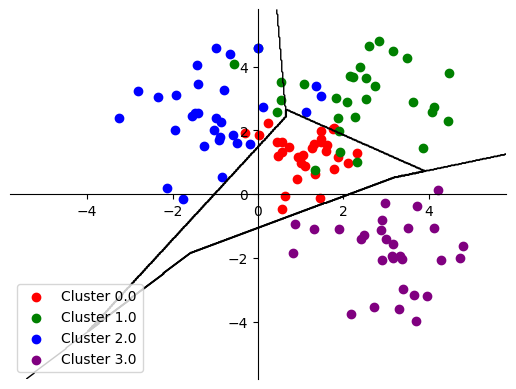

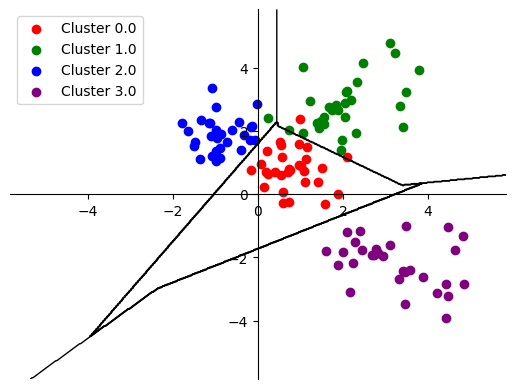

In [9]:
train_and_plot(SVC(kernel='linear'), dataset_1, labels_1)
train_and_plot(SVC(kernel='linear'), dataset_1_var, labels_1v)

train_and_plot(SVC(kernel='linear'), dataset_2, labels_2)
train_and_plot(SVC(kernel='linear'), dataset_2_var, labels_2v)

train_and_plot(SVC(kernel='linear'), dataset_3, labels_3)
train_and_plot(SVC(kernel='linear'), dataset_3_var, labels_3v)

train_and_plot(SVC(kernel='linear'), dataset_4, labels_4)
train_and_plot(SVC(kernel='linear'), dataset_4_var, labels_4v)

### Results
- These results look great, espeacially on the datasets with solid gaps, but classification gets more and more jumbled as the data moves inward. Despite this, it would appear to do a better job than K Means with some of these datasets, although it is an apples-to-oranges comparison with one algorithm being supervised and the other being unsupervised.
- There might be a solution to getting better results with this same algorithm
    - The big weakness with SVM is that the support vector classifiers are always linear. There is, however, a workaround for this.
    - A transformation can be applied to the support vector classifiers, sort of like going from linear to polynomail regression. This is called the kerel trick.
    - A popular kernel is RBF, which increases in how fitting it gets as the value of $\gamma$ increases.
    - We'll try out RBF with an initial value of $\gamma=0.1$

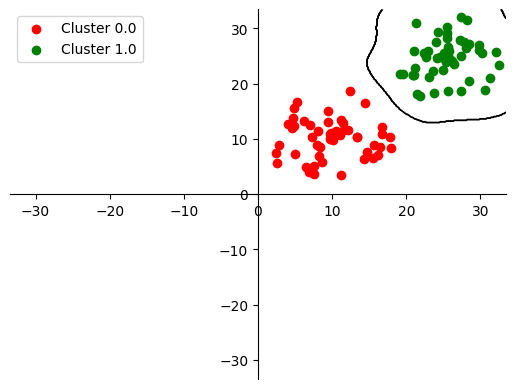

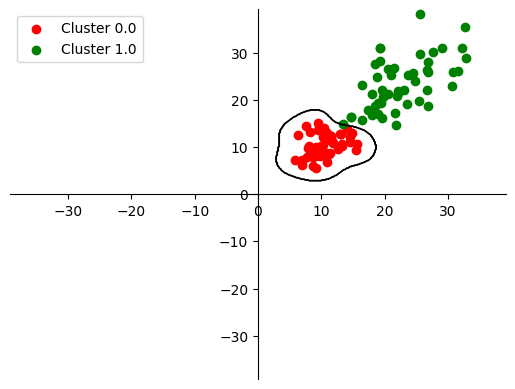

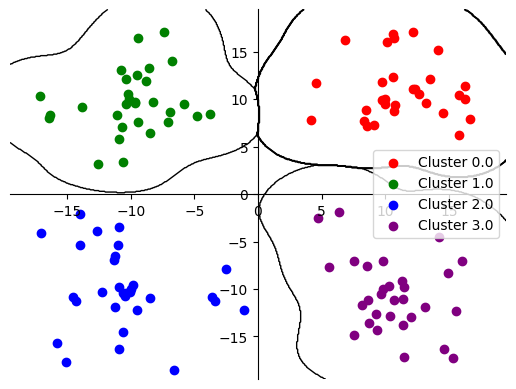

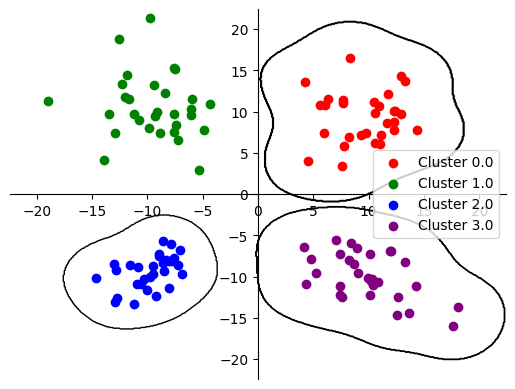

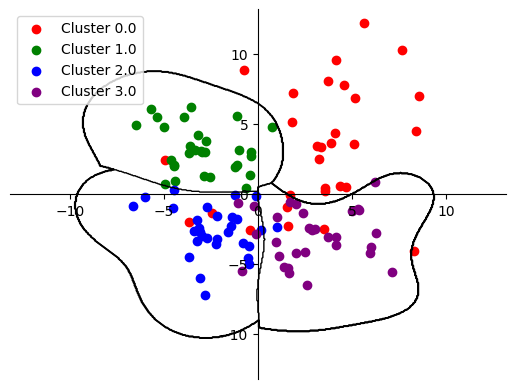

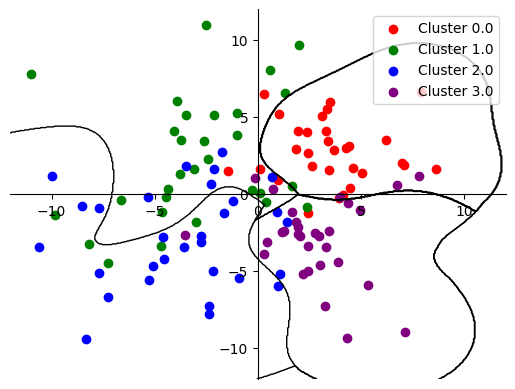

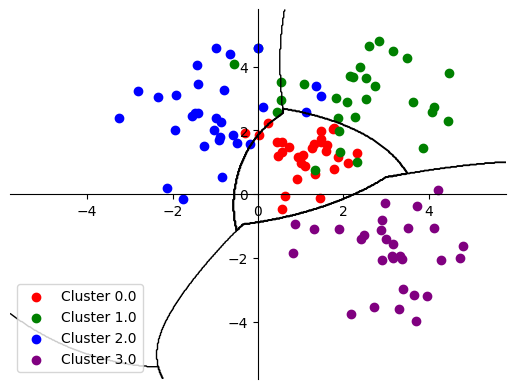

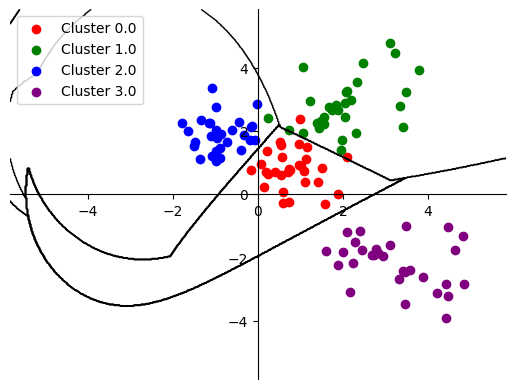

In [10]:
train_and_plot(SVC(kernel='rbf', gamma=0.1), dataset_1, labels_1)
train_and_plot(SVC(kernel='rbf', gamma=0.1), dataset_1_var, labels_1v)

train_and_plot(SVC(kernel='rbf', gamma=0.1), dataset_2, labels_2)
train_and_plot(SVC(kernel='rbf', gamma=0.1), dataset_2_var, labels_2v)

train_and_plot(SVC(kernel='rbf', gamma=0.1), dataset_3, labels_3)
train_and_plot(SVC(kernel='rbf', gamma=0.1), dataset_3_var, labels_3v)

train_and_plot(SVC(kernel='rbf', gamma=0.1), dataset_4, labels_4)
train_and_plot(SVC(kernel='rbf', gamma=0.1), dataset_4_var, labels_4v)

### Results
- These results are better on some of the more complicated datasets, but it's very unnecessary for the simpler ones. 
- We can already see some overfitting starting to creep in.
- Let's see what it's like with $\gamma=1$

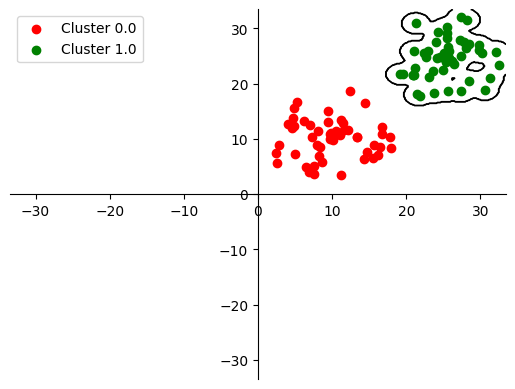

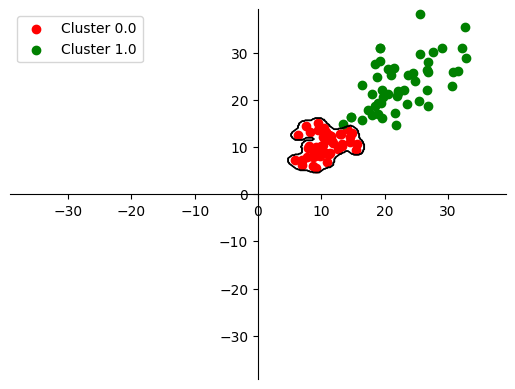

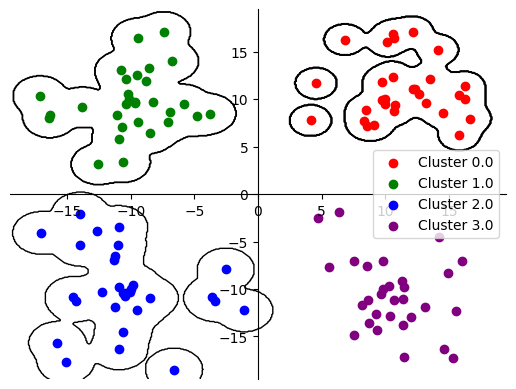

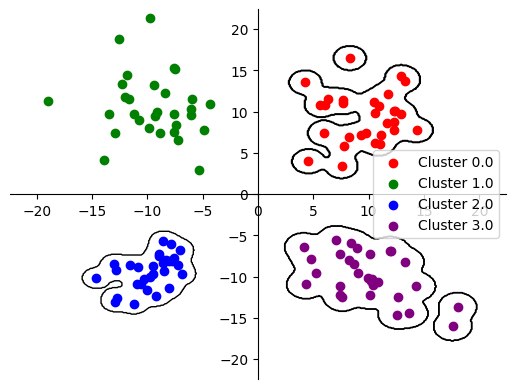

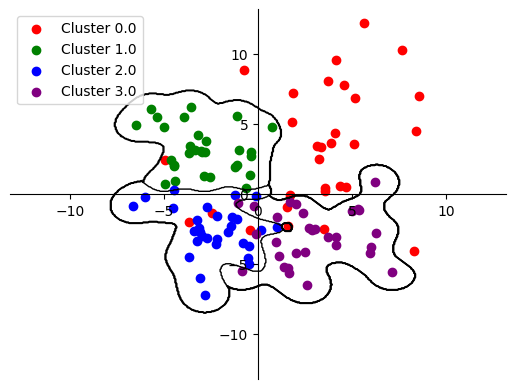

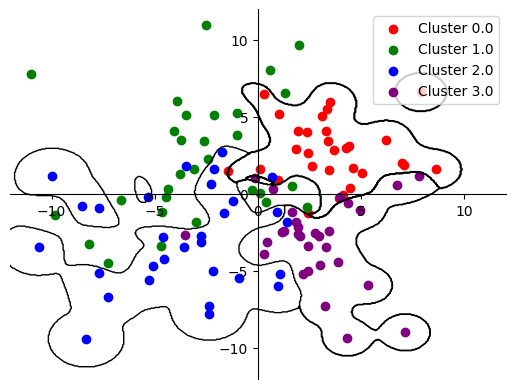

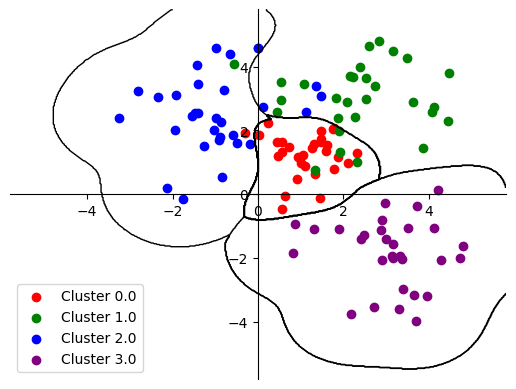

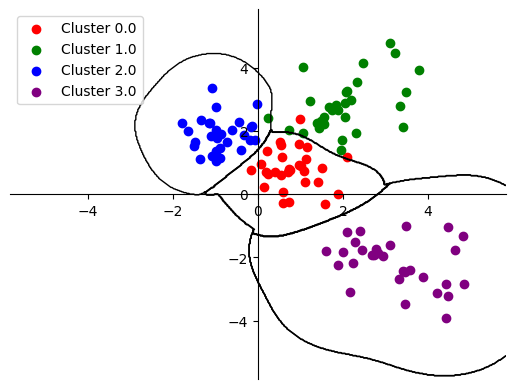

In [11]:
train_and_plot(SVC(kernel='rbf', gamma=1), dataset_1, labels_1)
train_and_plot(SVC(kernel='rbf', gamma=1), dataset_1_var, labels_1v)

train_and_plot(SVC(kernel='rbf', gamma=1), dataset_2, labels_2)
train_and_plot(SVC(kernel='rbf', gamma=1), dataset_2_var, labels_2v)

train_and_plot(SVC(kernel='rbf', gamma=1), dataset_3, labels_3)
train_and_plot(SVC(kernel='rbf', gamma=1), dataset_3_var, labels_3v)

train_and_plot(SVC(kernel='rbf', gamma=1), dataset_4, labels_4)
train_and_plot(SVC(kernel='rbf', gamma=1), dataset_4_var, labels_4v)

### Results
- And now we can see clear overfitting on the simpler datasets, but some very good results on the most complex ones. 
- The optimal value of $\gamma$ is highly dependent on your data.